In [1]:
from src.data_generate_sde import sde_langevin_landmarks
import jax.numpy as jnp
import jax

num_landmarks = 10
num_trajs = 10

# p0 = jax.random.normal(jax.random.PRNGKey(0), (num_landmarks, 2))
p0 = jnp.ones(shape=(num_landmarks, 2))
q0_x = jnp.linspace(0, 5, num_landmarks)
q0_y = jnp.zeros(num_landmarks)
q0 = jnp.stack([q0_x, q0_y], axis=1)
x0 = jnp.stack([p0, q0], axis=0)

T = 1.
N = 100

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

data_fn = sde_langevin_landmarks.data_forward(x0, T, N)
_, trajs, _ = data_fn(keys) # (n_trajs, N, p/q, landmarks, dim)



ValueError: Incompatible shapes for broadcasting: shapes=[(2, 10, 2), (40,)]

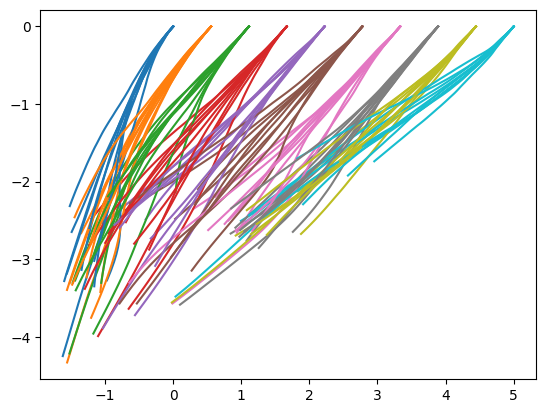

In [4]:
import matplotlib.pyplot as plt

q = trajs[:, :, 1]

for traj in range(num_trajs):
    for landmark in range(num_landmarks):
        plt.plot(q[traj, :, landmark, 0], q[traj, :, landmark, 1])
plt.show()
